<a href="https://colab.research.google.com/github/sm3015/Equity_Research/blob/main/Vasicek_CIR_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

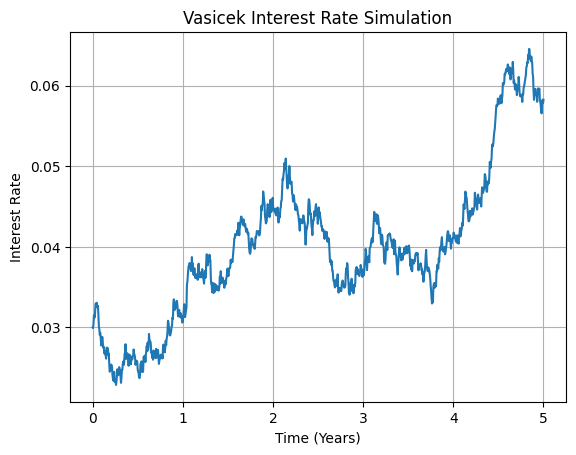

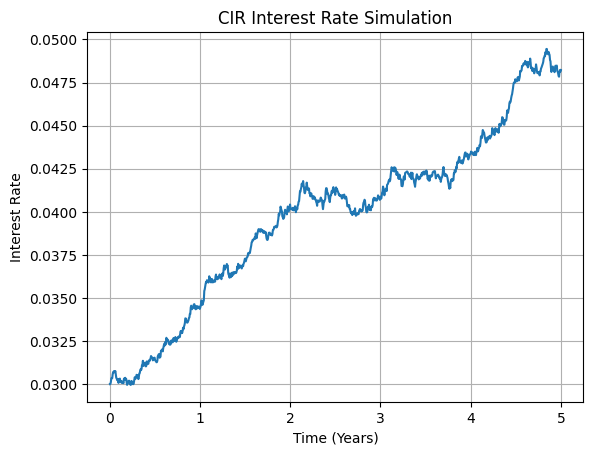

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Vasicek model parameters
a = 0.3      # Speed of mean reversion
b = 0.05       # Long-term mean
sigma = 0.01   # Volatility
r0 = 0.03      # Initial interest rate

# 2. Time settings
T = 5.0        # Total time in years
N = 1000       # Number of time steps
dt = T / N     # Time step
t = np.linspace(0, T, N)

# 3. Simulate Brownian motion increments
np.random.seed(42)  # For reproducibility
Z = np.random.normal(0, 1, N)
dW = np.sqrt(dt) * Z

# 4. Initialize interest rate array
r = np.zeros(N)
r[0] = r0
s = np.zeros(N)
s[0] = r0
# 5. Euler discretization
for i in range(1, N):
    r[i] = r[i-1] + a * (b - r[i-1]) * dt + sigma * dW[i]
    #r[i] = r[i-1] + a * (b - r[i-1]) * dt + sigma * dW[i]*np.sqrt(r[i-1])
    s[i] = s[i-1] + a * (b - s[i-1]) * dt + sigma * dW[i]*np.sqrt(s[i-1])

# 6. Plot the simulated path
plt.plot(t, r)
plt.title('Vasicek Interest Rate Simulation')
plt.xlabel('Time (Years)')
plt.ylabel('Interest Rate')
plt.grid(True)
plt.show()

plt.plot(t, s)
plt.title('CIR Interest Rate Simulation')
plt.xlabel('Time (Years)')
plt.ylabel('Interest Rate')
plt.grid(True)
plt.show()
